In [1]:
import os
import numpy as np
import xml.etree.ElementTree as et
import glob

In [2]:
with open("/extra_data/ayushya/VOCdevkit/VOC2010/Annotations/2008_003055.xml") as f:
    for line in f:
        print(line)

<annotation>

	<folder>VOC2010</folder>

	<filename>2008_003055.jpg</filename>

	<source>

		<database>The VOC2008 Database</database>

		<annotation>PASCAL VOC2008</annotation>

		<image>flickr</image>

	</source>

	<size>

		<width>500</width>

		<height>375</height>

		<depth>3</depth>

	</size>

	<segmented>0</segmented>

	<object>

		<name>horse</name>

		<pose>Unspecified</pose>

		<truncated>0</truncated>

		<occluded>0</occluded>

		<bndbox>

			<xmin>71</xmin>

			<ymin>78</ymin>

			<xmax>275</xmax>

			<ymax>361</ymax>

		</bndbox>

		<difficult>0</difficult>

	</object>

	<object>

		<name>horse</name>

		<pose>Unspecified</pose>

		<truncated>0</truncated>

		<occluded>0</occluded>

		<bndbox>

			<xmin>282</xmin>

			<ymin>40</ymin>

			<xmax>400</xmax>

			<ymax>299</ymax>

		</bndbox>

		<difficult>0</difficult>

	</object>

</annotation>



In [ ]:
listn = []
for filen in glob.glob("/extra_data/ayushya/VOCdevkit/VOC2010/Annotations/*.xml"):
    treef = et.parse(filen)
    root = treef.getroot()
    for obj in root.findall('object'):
        if ('person'==str(obj.find('name').text)):
            listn.append(filen.split("/")[-1].split(".")[-2])
            break

In [1]:
import os
import numpy as np
import xml.etree.ElementTree as et
import glob

# with open("/extra_data/ayushya/VOCdevkit/VOC2010/Annotations/2008_003055.xml") as f:
#     for line in f:
#         print(line)

listn = []
for filen in glob.glob("/extra_data/ayushya/VOCdevkit/VOC2010/Annotations/*.xml"):
    treef = et.parse(filen)
    root = treef.getroot()
    for obj in root.findall('object'):
        if ('person'==str(obj.find('name').text)):
            listn.append(filen.split("/")[-1].split(".")[-2])
            break



The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
list2 = []
with open('/extra_data/ayushya/pascal_data/pascal_data/train_id.txt','r') as f:
    for line in f:
        line = line[:-1]
        list2.append(line)

with open('/extra_data/ayushya/pascal_data/pascal_data/val_id.txt','r') as f:
    for line in f:
        line = line[:-1]
        list2.append(line)


In [10]:
0.75*len(listn)


3479.25

In [4]:
np.random.shuffle(listn)
count = 0
with open('/extra_data/ayushya/pascal_data/pascal_data/train_fcn.txt','w') as f:
    for line in listn:
        count=count+1
        f.write(line+'\n')
        if count>0.75*len(listn):
            break

In [7]:
count = 0
with open('/extra_data/ayushya/pascal_data/pascal_data/val_fcn.txt','w') as f:
    for line in listn:
        count=count+1
        if count>0.75*len(listn):
            f.write(line+'\n')
        

In [3]:
import scipy.io as sio
import scipy.misc
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob

In [4]:
parts_list = ['head', 'leye', 'reye', 'lear', 'rear',
              'lebrow', 'rebrow', 'nose', 'mouth', 'hair',
              'torso', 'neck', 'llarm', 'luarm', 'lhand',
              'rlarm', 'ruarm', 'rhand', 'llleg', 'luleg',
              'lfoot', 'rlleg', 'ruleg', 'rfoot']
merged_parts_list = {'head': 1, 'leye': 1, 'reye': 1, 'lear': 1, 'rear': 1,
                     'lebrow': 1, 'rebrow': 1, 'nose': 1, 'mouth': 1, 'hair': 1,
                     'torso': 2, 'neck': 2,
                     'llarm': 4, 'luarm': 3, 'lhand': 4,
                     'rlarm': 4, 'ruarm': 3, 'rhand': 4,
                     'llleg': 6, 'luleg': 5, 'lfoot': 6,
                     'rlleg': 6, 'ruleg': 5, 'rfoot': 6}

In [5]:
def make_mask(matfile):
    flag = 0
    d = sio.loadmat(matfile)
    if "image" in matfile:
        parts_mask = np.transpose(np.expand_dims(d["M"], 0), (1, 2, 0))
    else:
        objects = d["anno"][0, 0][1]
        object_name = [objects[0, i][0][0] for i in range(objects.shape[1])]
        img_shape = objects[0, 0][2].shape
        parts_mask = np.zeros(img_shape + (1, ))
        for index, obj in enumerate(object_name):
            if obj == "person":
                flag = 1
                if not objects[0, index][3].shape == (0, 0):
                    for j in range(objects[0, index][3].shape[1]):
                        parts_mask[:, :, 0] = np.where(parts_mask[:, :, 0] == 0, merged_parts_list[objects[0, index][3][0, j][0][0]] * np.array(objects[0, index][3][0, j][1]), parts_mask[:, :, 0])
    return parts_mask, flag

In [6]:
if not os.path.exists('/extra_data/ayushya/VOCdevkit/VOC2010/Seg_Parts/'):
    os.mkdir('/extra_data/ayushya/VOCdevkit/VOC2010/Seg_Parts')
count = 0
for matfile in glob.glob('/extra_data/ayushya/VOCdevkit/VOC2010/Annotations_Part/*.mat'):
    name = matfile.split("/")[-1].split(".")[-2]
    pmask, flag = make_mask(matfile)
    if flag:
        count+=1
        scipy.misc.imsave('/extra_data/ayushya/VOCdevkit/VOC2010/Seg_Parts/'+name+'.png', pmask[:,:,0])

KeyboardInterrupt: 

In [ ]:
count

In [ ]:
print(pmask.shape)
plt.imshow(pmask[:,:,0])
plt.show()

In [ ]:
for matfile in glob.glob('/new_data/gpu/abhiagwl/Datasets/MPII/'):
    name = matfile.split("/")[-1].split(".")[-2]
    

In [1]:
import torch
from __future__ import division, print_function, unicode_literals
import numpy as np
import argparse
import os
import os.path as osp
import tqdm
import math
import torch.utils.data
import torchvision.models as models
import torchvision.transforms as transforms
import glob
import torchvision
import PIL.Image
from torch.autograd import Variable
import torch.nn.functional as F
import collections
import torch.nn as nn
import scipy.misc
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import torchfcn

import fcn

import cv2

In [2]:
cuda = torch.cuda.is_available()

torch.manual_seed(1337)
if cuda:
    torch.cuda.manual_seed(1337)

root = osp.expanduser('/extra_data/ayushya/')
kwargs = {'num_workers': 4, 'pin_memory': True} if cuda else {}
    
train_loader = torch.utils.data.DataLoader(
    torchfcn.datasets.PAF_loader_test(root, split='train', transform=True,test_par = 0.002),batch_size=1, shuffle=False, **kwargs)

In [3]:
num_epochs = 0

In [4]:
lossTEST = nn.MSELoss()

In [5]:
for batch_idx, (data, targetposeo, targetpafo, targetpath) in tqdm.tqdm(
                enumerate(train_loader), total=len(train_loader),
                desc='Train epoch=%d' % num_epochs, ncols=80, leave=False):
        
        iteration = batch_idx + num_epochs * len(train_loader)
        if cuda:
            data, targetpose, targetpaf = data.cuda(), targetpose.cuda(), targetpaf.cuda()
        data, targetpose, targetpaf = Variable(data), Variable(targetpose), Variable(targetpaf)
        m = nn.AvgPool2d((2, 2), stride=(2, 2), ceil_mode=True)
        mp = nn.ZeroPad2d(99)
        targetpose = m(m(m(mp(targetposeo))))
        targetpaf = m(m(m(mp(targetpafo))))
#         mask_paf = torch.ne(targetpaf,0)
        mask_pose1 = torch.gt(targetpose,0.2)
        mask_pose1_ = (mask_pose1==0).type(torch.cuda.FloatTensor)
        mask_pose1 = mask_pose1.type(torch.cuda.FloatTensor)
        mask_pose2 = torch.gt(targetpose,0.02).type(torch.cuda.FloatTensor)
#         print (targetpose.size(),mask_pose1.size())
        targetpose1 = targetpose*mask_pose1
        gt = targetpose1

#         mask_pose1_ = torch.ones(mask_pose1.size()) -mask_pose1
        
#         mask_pose1_ = torch.ones(mask_pose1.size()) -mask_pose1
#         mask_pose2_ = torch.ones(mask_pose2.size()) -mask_pose2
        
        targetpose2 = targetpose*mask_pose2
        
        pred = targetpose2*mask_pose1
        
        pred_ = targetpose2*mask_pose1_
        
        loss2 = lossTEST(gt,pred)
        loss = torch.sum((gt-pred)**2)
        
        loss3 = torch.sum(pred_**2)
        
        number = torch.nonzero(mask_pose1.data).size(0)
        number2 = torch.nonzero(mask_pose1_.data).size(0)
#         loss/=number
        print (loss,loss2,loss3/number2)
#         targetpaf_ = targetpaf*mask_paf



Variable containing:
 0
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 Variable containing:
 0
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 Variable containing:
1.00000e-05 *
  1.0830
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 Variable containing:
 0
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 Variable containing:
1.00000e-06 *
  3.9819
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 Variable containing:
 0
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 Variable containing:
1.00000e-06 *
  8.8165
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 Variable containing:
 0
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 Variable containing:
1.00000e-06 *
  9.4509
[torch.cuda.FloatTensor of size 1 (GPU 0)]



In [6]:
mask_pose1

Variable containing:
(0 ,0 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

(0 ,1 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

(0 ,2 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   ...

(0 ,11,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

(0 ,12,.,.) = 
   0   0   0  ...    0   

In [7]:
len(train_loader)

4

In [20]:
vis_pose =[]
vis_paf = []
img_pose =[]
img_paf =[]
for batch_idx, (data, targetpose, targetpaf, targetpath) in enumerate(train_loader):
        
        iteration = batch_idx + num_epochs * len(train_loader)
        if cuda:
            data, targetpose, targetpaf = data.cuda(), targetpose.cuda(), targetpaf.cuda()
        data, targetpose, targetpaf = Variable(data), Variable(targetpose), Variable(targetpaf)
        
        m = nn.AvgPool2d((2, 2), stride=(2, 2), ceil_mode=True)
        mp = nn.ZeroPad2d(99)
        
        targetpose = m(m(m(mp(targetpose))))
        targetpaf = m(m(m(mp(targetpaf))))
        
        imgs = data.data.cpu()
        
        targetpaf = torch.abs(targetpaf)
        pose_lab = targetpose.data.max(1)[0].cpu().numpy()
        paf_lab = targetpaf.data.max(1)[0].cpu().numpy()
        
        for img, lt,lt_ in zip(imgs, paf_lab,pose_lab):
            img_ = train_loader.dataset.untransform(img)
#             print ("paf:",lt.shape)
#             plt.figure()
#             plt.imshow(img_)
#             plt.show()
            lt_ = scipy.misc.imresize(lt_, (img_.shape[0],img_.shape[1]))
            lt = scipy.misc.imresize(lt, (img_.shape[0],img_.shape[1]))
#             plt.figure()
#             plt.imshow(img_)
#             plt.show()
            img_pose.append(img_)
            paf_rgb = np.dstack([lt,lt,lt])
            pose_rgb = np.dstack([lt_,lt_,lt_])
            vis_paf.append(paf_rgb)
            vis_pose.append(pose_rgb)
            
            vis1 = np.hstack([img_,paf_rgb,pose_rgb])
            vis2 = np.hstack([img_,paf_rgb,pose_rgb])
            vis3 = np.vstack([vis1,vis2])
            img_paf.append(vis3)
#             viz = fcn.utils.visualize_segmentation(
#                 lbl_pred=lt, lbl_true=lt, img=img_, n_class=26)
#             vis_paf.append(viz)
            
#             viz = fcn.utils.visualize_segmentation(
#                 lbl_pred=lt_, lbl_true=lt_, img=img_, n_class=14)
#             vis_pose.append(viz)
#             img_paf.append(img_)


In [21]:
backtorgb = cv2.cvtColor(vis_paf[0][:,:,0],cv2.COLOR_GRAY2RGB)

0


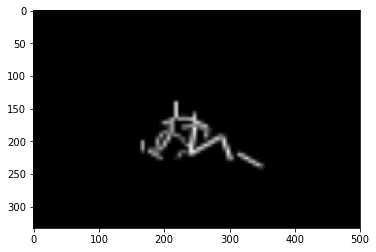

In [22]:
plt.figure()
print(backtorgb.min())
plt.imshow(backtorgb)
plt.show()

In [23]:
type(backtorgb)

numpy.ndarray

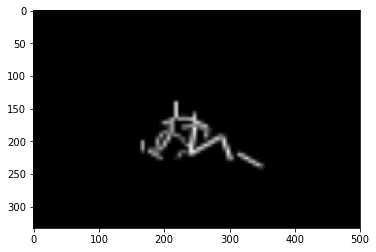

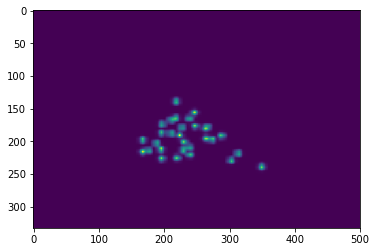

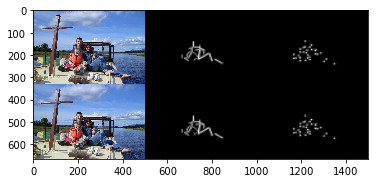

In [24]:
plt.figure()
plt.imshow(vis_paf[0])
plt.show()
plt.figure()
plt.imshow(vis_pose[0][:,:,0])
plt.show()
# plt.figure()
# print (img_pose[0].s)
# temp = np.ones_like(img_pose[0])*255
# print(np.max(vis_paf[0]),vis_paf[0].min())
# plt.imshow(np.hstack([img_pose[0],(vis_paf[0]*255).astype("uint8")]))
# plt.show()
plt.figure()
plt.imshow(img_paf[0])
plt.show()

In [11]:
plt.figure()
plt.imshow(vis_pose[1])
plt.show()
plt.figure()
plt.imshow(img_paf[1])
plt.show()

IndexError: list index out of range

In [55]:
from torch.optim.lr_scheduler import StepLR

Train epoch=10:   0%|                                     | 0/2 [00:00<?, ?it/s]

(3, 333, 500)
(14, 67, 88)
paf 0.0
pose 0.0035038
(67, 88, 3)


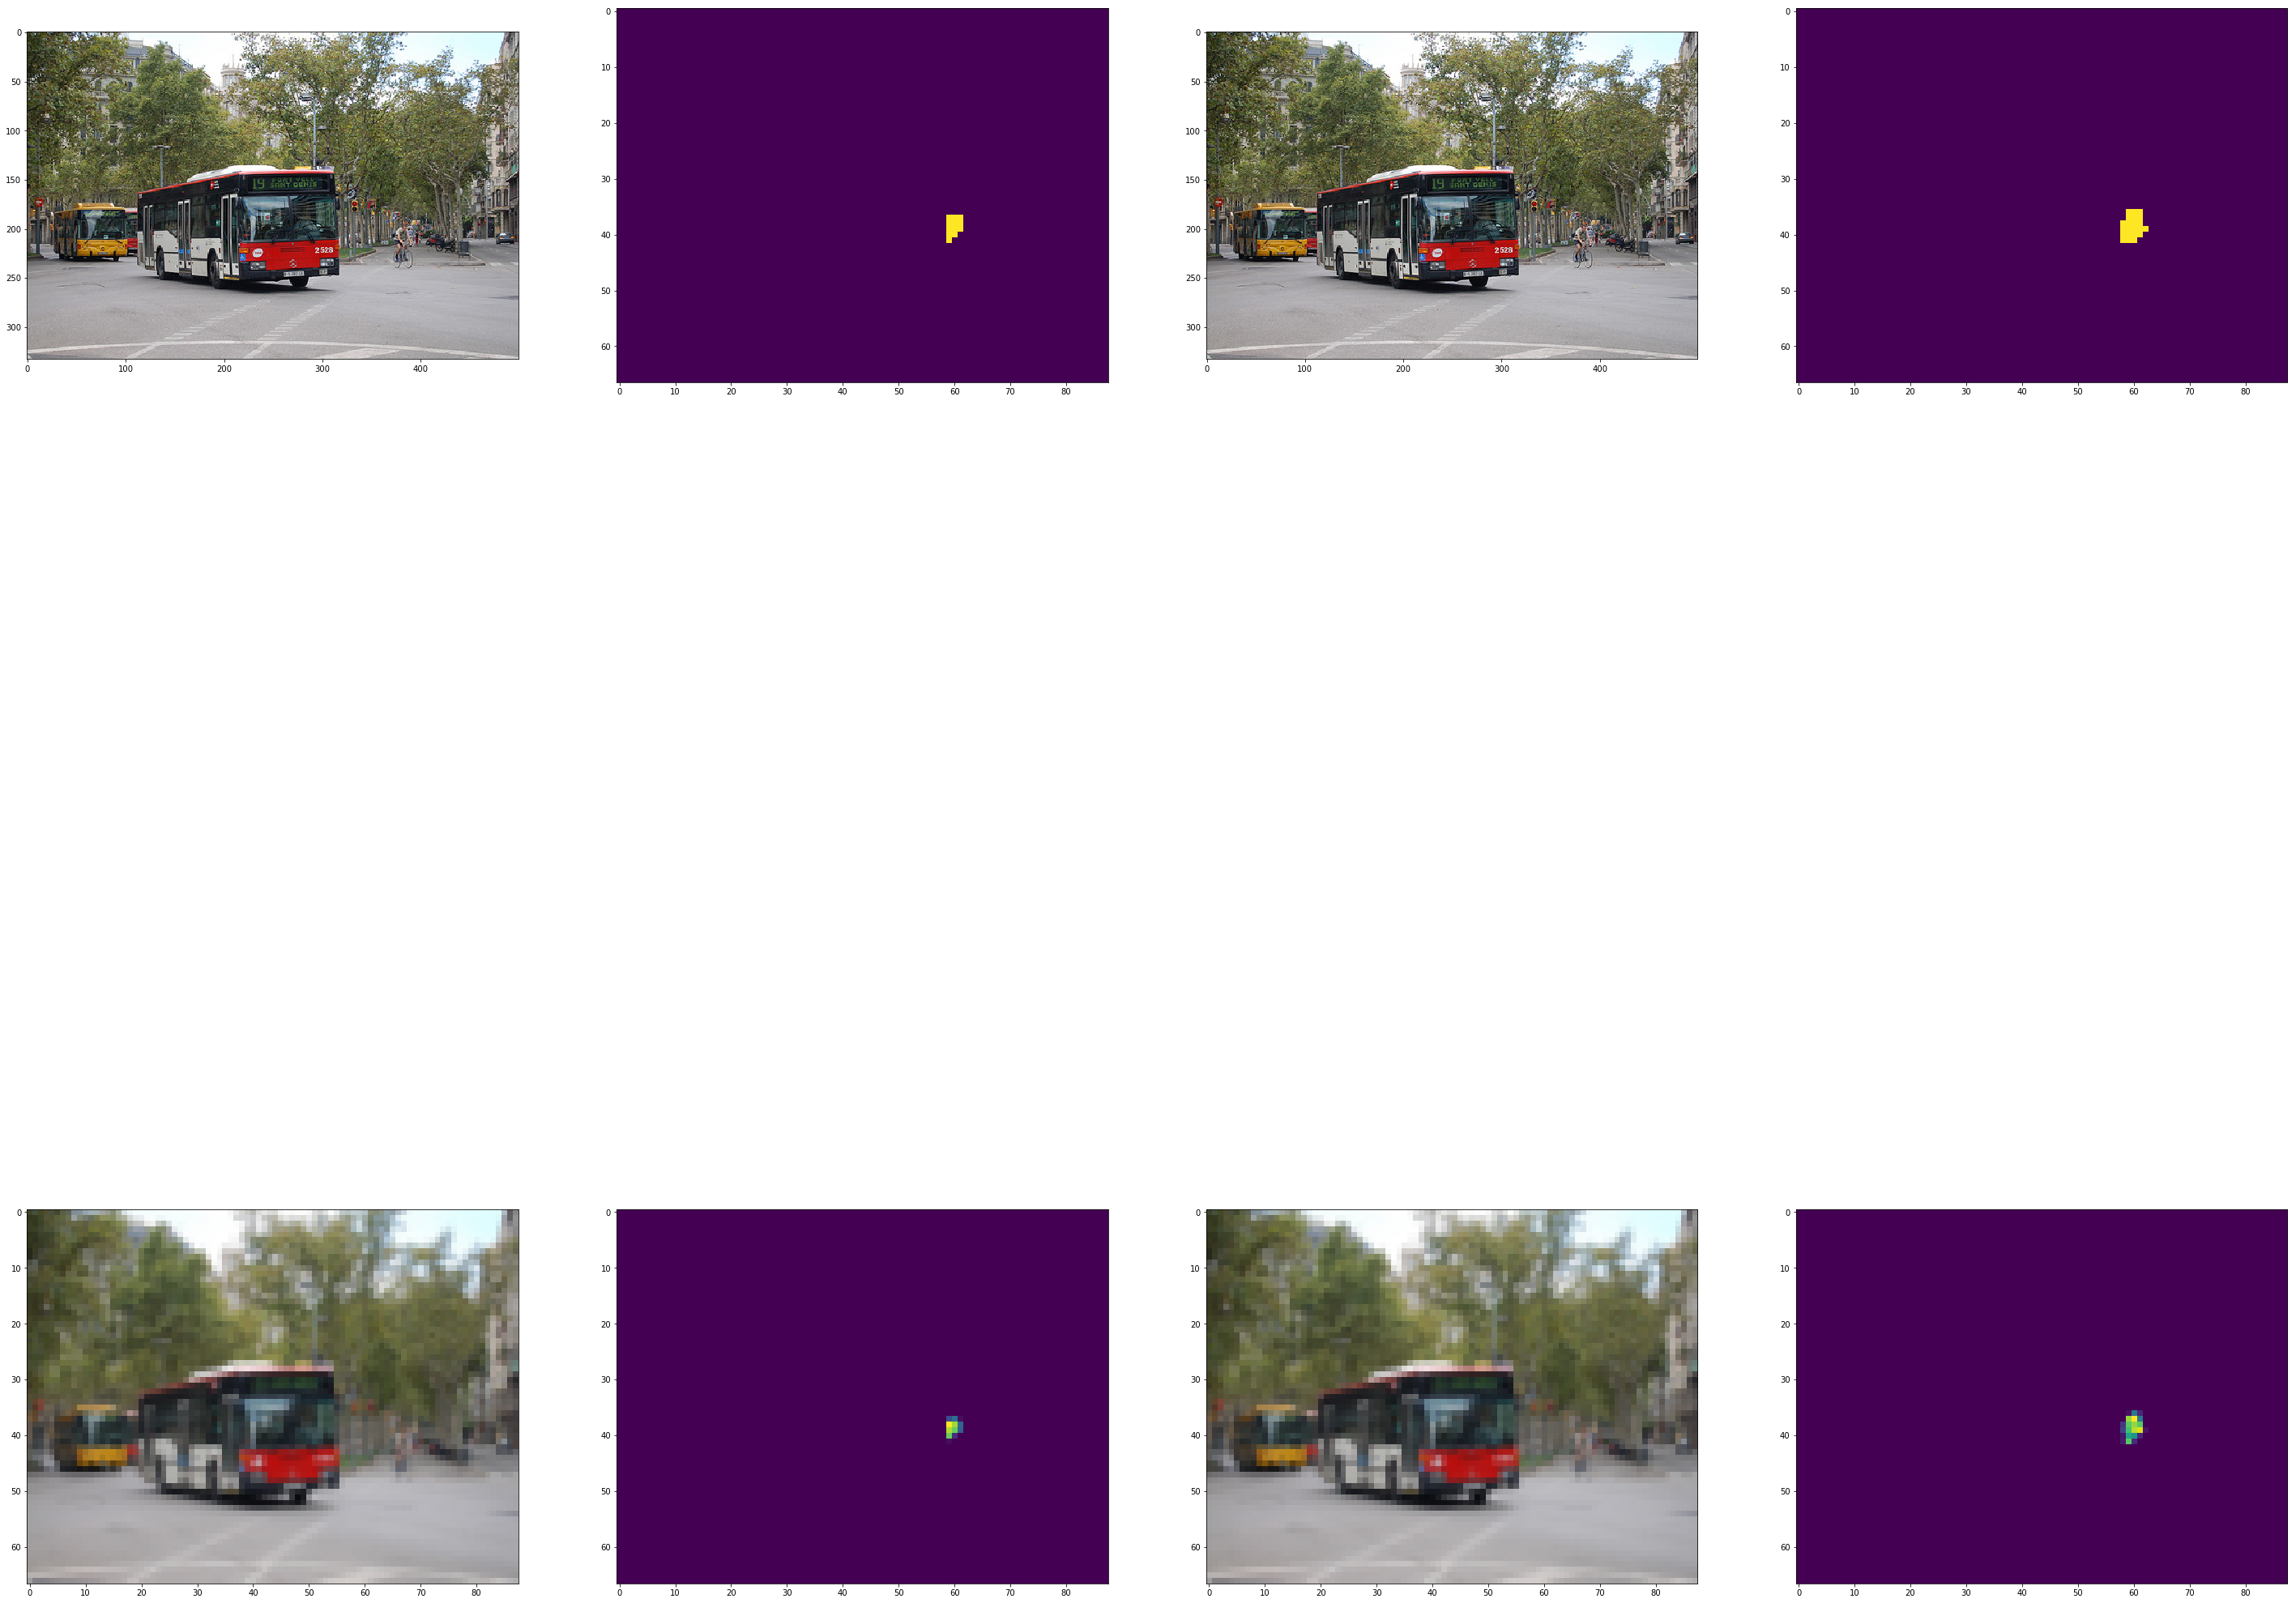

Train epoch=10:  50%|██████████████▌              | 1/2 [00:02<00:02,  2.27s/it]

(3, 333, 500)
(14, 67, 88)
paf 0.0
pose 0.00822145
(67, 88, 3)


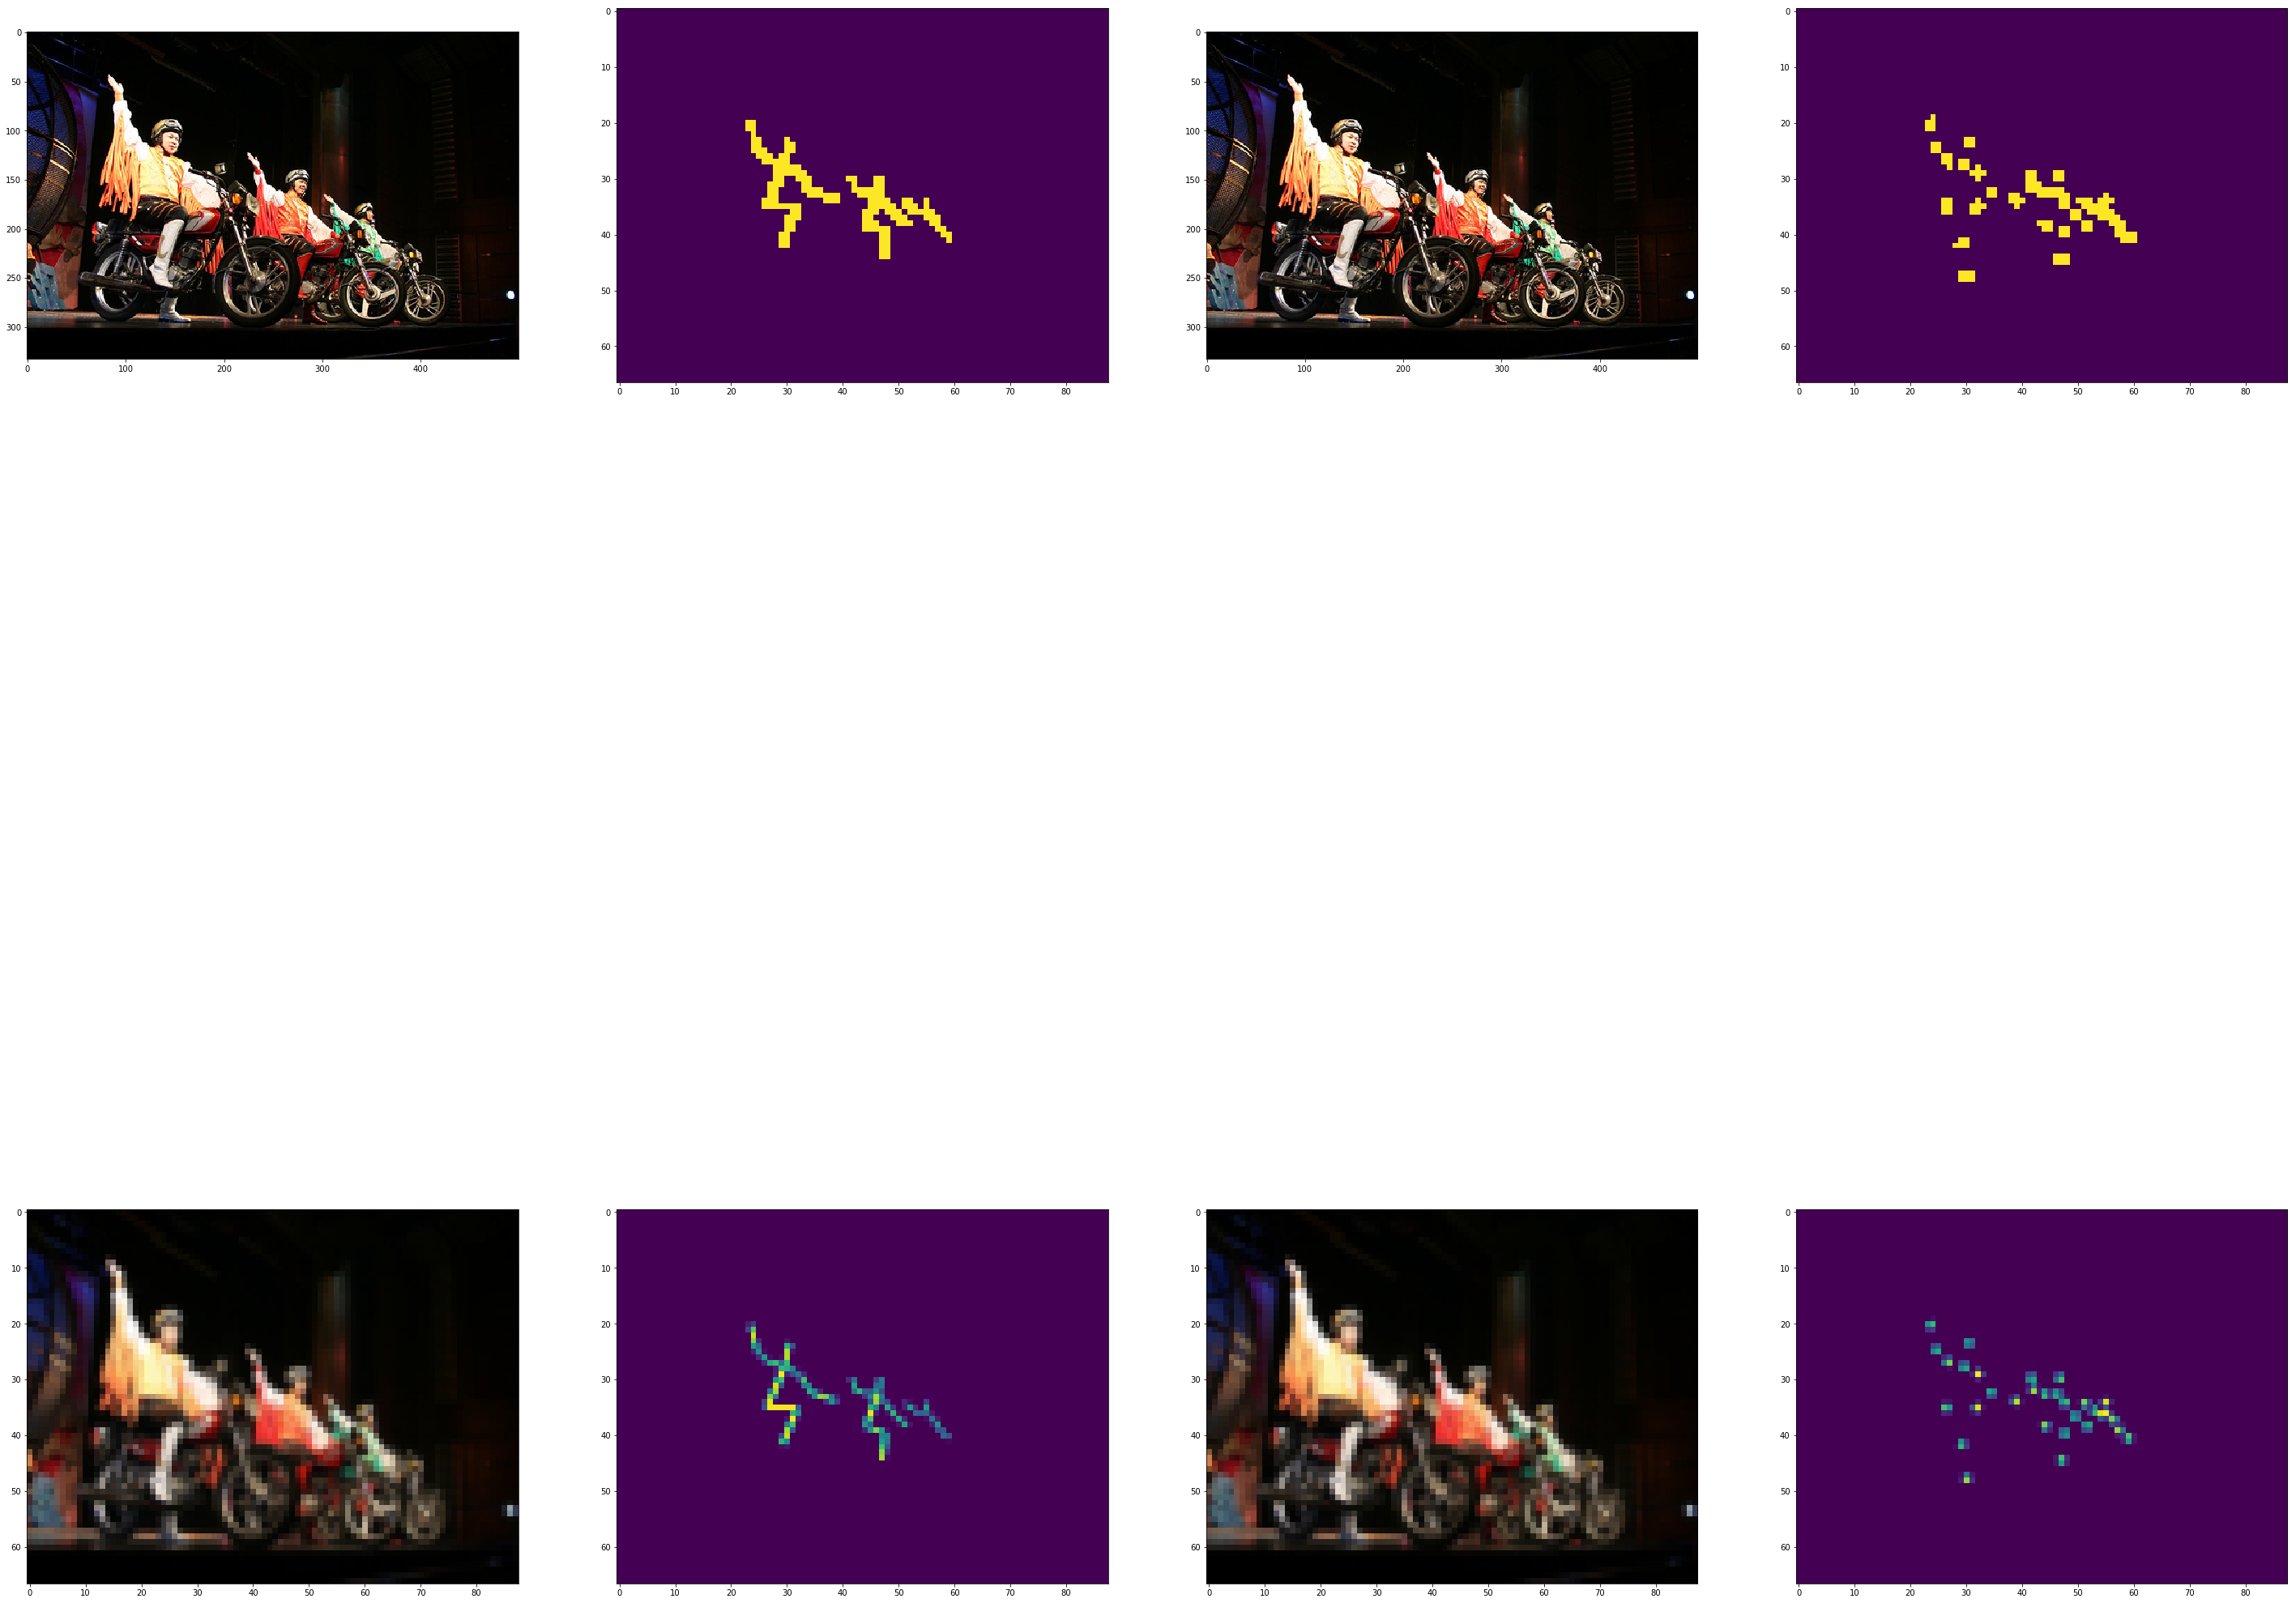

In [33]:
for batch_idx, (data, targetpose, targetpaf, targetpath) in tqdm.tqdm(
                enumerate(train_loader), total=len(train_loader),
                desc='Train epoch=%d' % num_epochs, ncols=80, leave=False):
        
        iteration = batch_idx + num_epochs * len(train_loader)
        if cuda:
            data, targetpose, targetpaf = data.cuda(), targetpose.cuda(), targetpaf.cuda()
        data, targetpose, targetpaf = Variable(data), Variable(targetpose), Variable(targetpaf)
        m = nn.AvgPool2d((2, 2), stride=(2, 2), ceil_mode=True)
        mp = nn.ZeroPad2d(99)
        targetpose = m(m(m(mp(targetpose))))
        targetpaf = m(m(m(mp(targetpaf))))
        for img, lt in zip(data, targetpose):
            segment_,_ = train_loader.dataset.untransform(img.data.cpu(),lt.data.max(1)[1].cpu())
        targetpose = torch.squeeze(targetpose)
        targetpaf = torch.squeeze(targetpaf)
        targetpose = targetpose.data.cpu().numpy()
        mask_pose = targetpose>0.02
        targetpose_ = mask_pose*targetpose
        targetpaf = targetpaf.data.cpu().numpy()
        mask_paf = targetpaf!=0
        targetpaf_ = mask_paf*targetpaf
        print (targetpose.shape)
        print ("paf",np.sum((targetpaf-targetpaf_)**2))
        print ("pose",np.sum((targetpose-targetpose_)**2))
        plt.figure(figsize=(50,50))
        plt.subplot(2,4,1)
        plt.imshow(segment_)#.reshape((s[1],s[2],s[0])))
        plt.subplot(2,4,2)
#         plt.imshow(np.abs(np.squeeze(targetpaf.data.cpu().numpy())).max(axis=0))
        plt.imshow(np.abs(mask_paf).max(axis=0))
        plt.subplot(2,4,3)
        plt.imshow(segment_)
        plt.subplot(2,4,4)
#         plt.imshow(np.max(np.squeeze(targetpose.data.cpu().numpy()),axis=0))
        plt.imshow(np.max(mask_pose,axis=0))
        img = scipy.misc.imresize(segment_, (targetpose.shape[1],targetpose.shape[2]))
        print(img.shape)
        plt.subplot(2,4,5)
        plt.imshow(img)#.reshape((s[1],s[2],s[0])))
        plt.subplot(2,4,6)
        plt.imshow(np.abs(targetpaf_).max(axis=0))
        plt.subplot(2,4,7)
        plt.imshow(img)
        plt.subplot(2,4,8)
#         plt.imshow(np.max(np.squeeze(targetpose.data.cpu().numpy()),axis=0))
        plt.imshow(np.max(targetpose_,axis=0))
        plt.show()

In [21]:
def genmat(path,image):
    H,W,_ = image.shape
    xcount = 0
    # Hn = np.ceil(H/8).astype(np.int64)
    # Wn = np.ceil(W/8).astype(np.int64)
    mat = scipy.io.loadmat(path)
    limbs = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13]]
    out = np.zeros((14,H,W))
    paf = np.zeros((26,H,W))
    x, y = np.meshgrid(np.arange(W), np.arange(H))
    for human in mat['joints'][0]:
        poselist = np.around(human[:,:-1]).astype(np.int64)
        # poselist[:,0] = poselist[:,0]*Hn/H
        # poselist[:,1] = poselist[:,1]*Wn/W
        vis = human[:,2]
        #PAF GT
        for (i,limb) in enumerate(limbs):
            p1 = poselist[limb[0],:]
            p2 = poselist[limb[1],:]
            if not (vis[limb[0]]==0 or vis[limb[1]]==0):
                if (p1[0]==p2[0] and p1[1]==p2[1]):
                    xcount+=1
                    print(xcount)
    #             if (np.all(p1>0) and np.all(p2>0)):
                #APPROX RECON
                dvec = (p2-p1)/np.linalg.norm(p2-p1)
                vecx = x - p1[0]
                vecy = y - p1[1]
                dot = vecx*dvec[0] + vecy*dvec[1]
                perp2 = vecx**2+vecy**2-dot**2
                boolmat = (dot>0) & (dot<np.linalg.norm(p2-p1)) & (perp2<np.linalg.norm(p2-p1)*0.2) #sigma^2
                paf[2*i][boolmat] = dvec[0]
                paf[2*i+1][boolmat] = dvec[1]
    #                     print(dvec)
        #POSE GT
    #             print(human)
        for (i,pose) in enumerate(poselist):
    #                 print(pose)
            if not (vis[i]==0):
                tmp = np.exp(-((x-pose[0])**2 + (y-pose[1])**2)/(2.0*10.0))
                out[i] = np.maximum(out[i],tmp)
    return out,paf

In [22]:
test_par = 0.001
root = '/extra_data/ayushya'
files = collections.defaultdict(list)

for split in ['train', 'val']:
            imgsets_file = osp.join(root,'pascal_data/pascal_data/%s_idnew.txt' % split)
            np.random.seed(2)
            img_id_list = [did.strip() for did in open(imgsets_file)]
            np.random.shuffle(img_id_list)
            img_id_list = img_id_list[:np.ceil(test_par*len(img_id_list)).astype(np.int32)]
            for did in img_id_list:
                img_file = osp.join(root, 'VOCdevkit/VOC2010/JPEGImages/%s.jpg' % did)
                lbl_file = osp.join(root, 'pascal_data/pascal_data/PersonJoints/%s.mat' % did)
                files[split].append({
                    'img': img_file,
                    'lbl': lbl_file,
                })

In [23]:
max_value = 16581375 #255**3
interval = int(max_value / 14)
colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]

cmap = [(int(i[:2], 16), int(i[2:4], 16), int(i[4:], 16)) for i in colors]
cmap2 = [(int(i[:2],16)/255, int(i[2:4],16)/255, int(i[4:],16)/255) for i in colors]
handles = [
    Rectangle((0,0),1,1, color = c) for c in cmap2
]
labels = ['head',
        'neck',
        'lshou',
        'lelbow',
        'lwrist',
        'lhip',
        'lknee',
        'lankle',
        'rshoul',
        'relb',
        'rwrist',
        'rhip',
        'rknee',
        'rankle',]

(333, 500, 3)
(3, 333, 500)
(333, 500, 3)


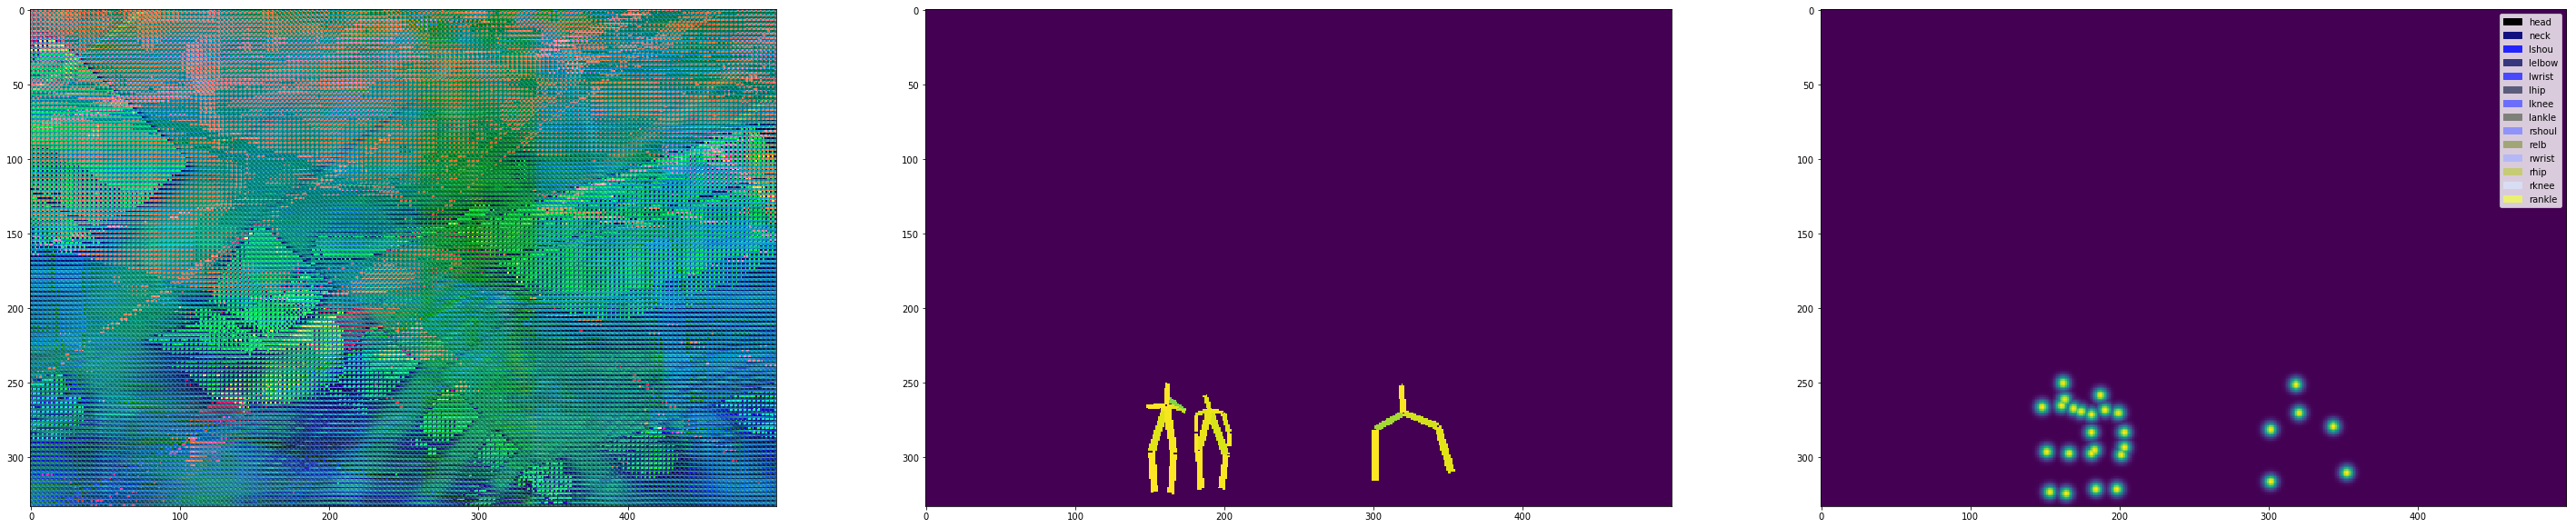

(500, 500, 3)
(3, 500, 500)
(500, 500, 3)


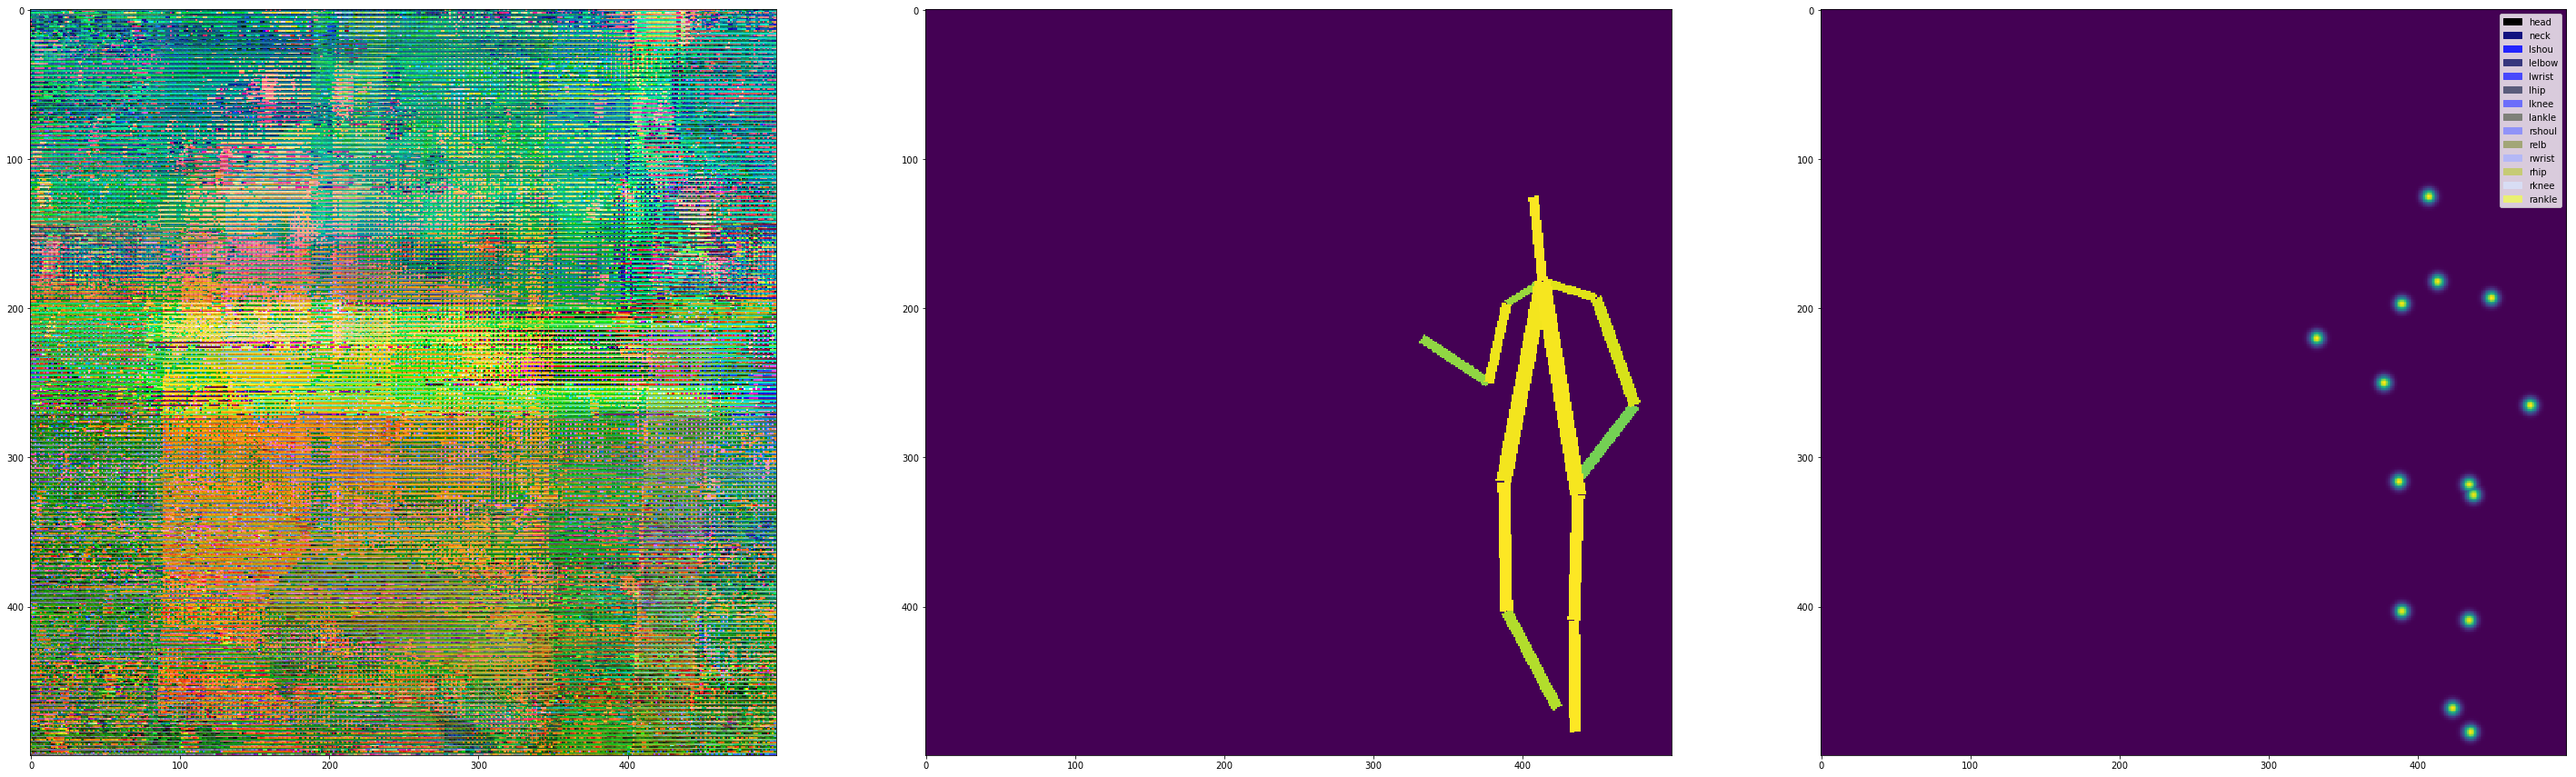

In [38]:
mean_bgr = np.array([104.00698793, 116.66876762, 122.67891434])
    
for ifile in files['val']:
    segment = PIL.Image.open(ifile['img'])
    # print(segment.size)
    segment = np.array(segment,dtype=np.uint8)
    s = segment.shape
    print (segment.shape)
    segment = segment.reshape((s[2],s[0],s[1]))
    print (segment.shape)
#     segment = np.transpose(segment,(1,2,0))
    segment = segment.transpose(1,2,0)-mean_bgr
    print (segment.shape)
    # print(segment.shape)
    out,paf = genmat(ifile['lbl'],segment)
    tmp = np.ones((out.shape[1],out.shape[2],3))
    for i in range(len(out)):
        tmp[out[i]>0.5] = cmap2[i] 

    plt.figure(figsize=(50,50))
    plt.subplot(1,3,1)
    plt.imshow(segment)
    plt.subplot(1,3,2)
    plt.imshow(np.abs(paf).max(axis=0))
#     plt.imshow(out[:8].max(axis=0))
    plt.subplot(1,3,3)
    plt.imshow(np.max(out,axis=0))
    plt.legend(handles,labels)
    plt.show()

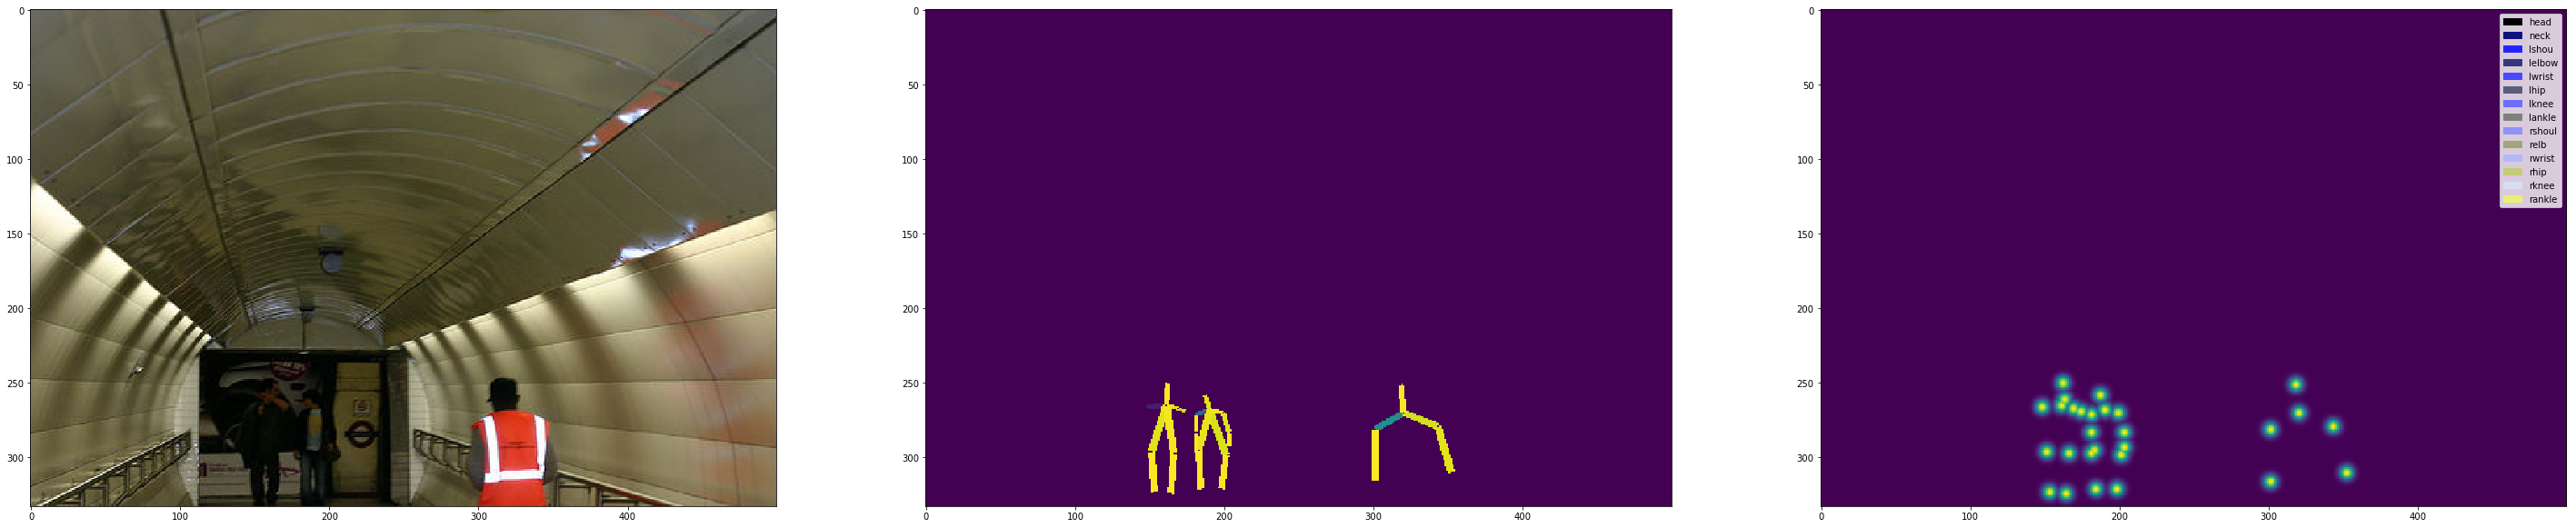

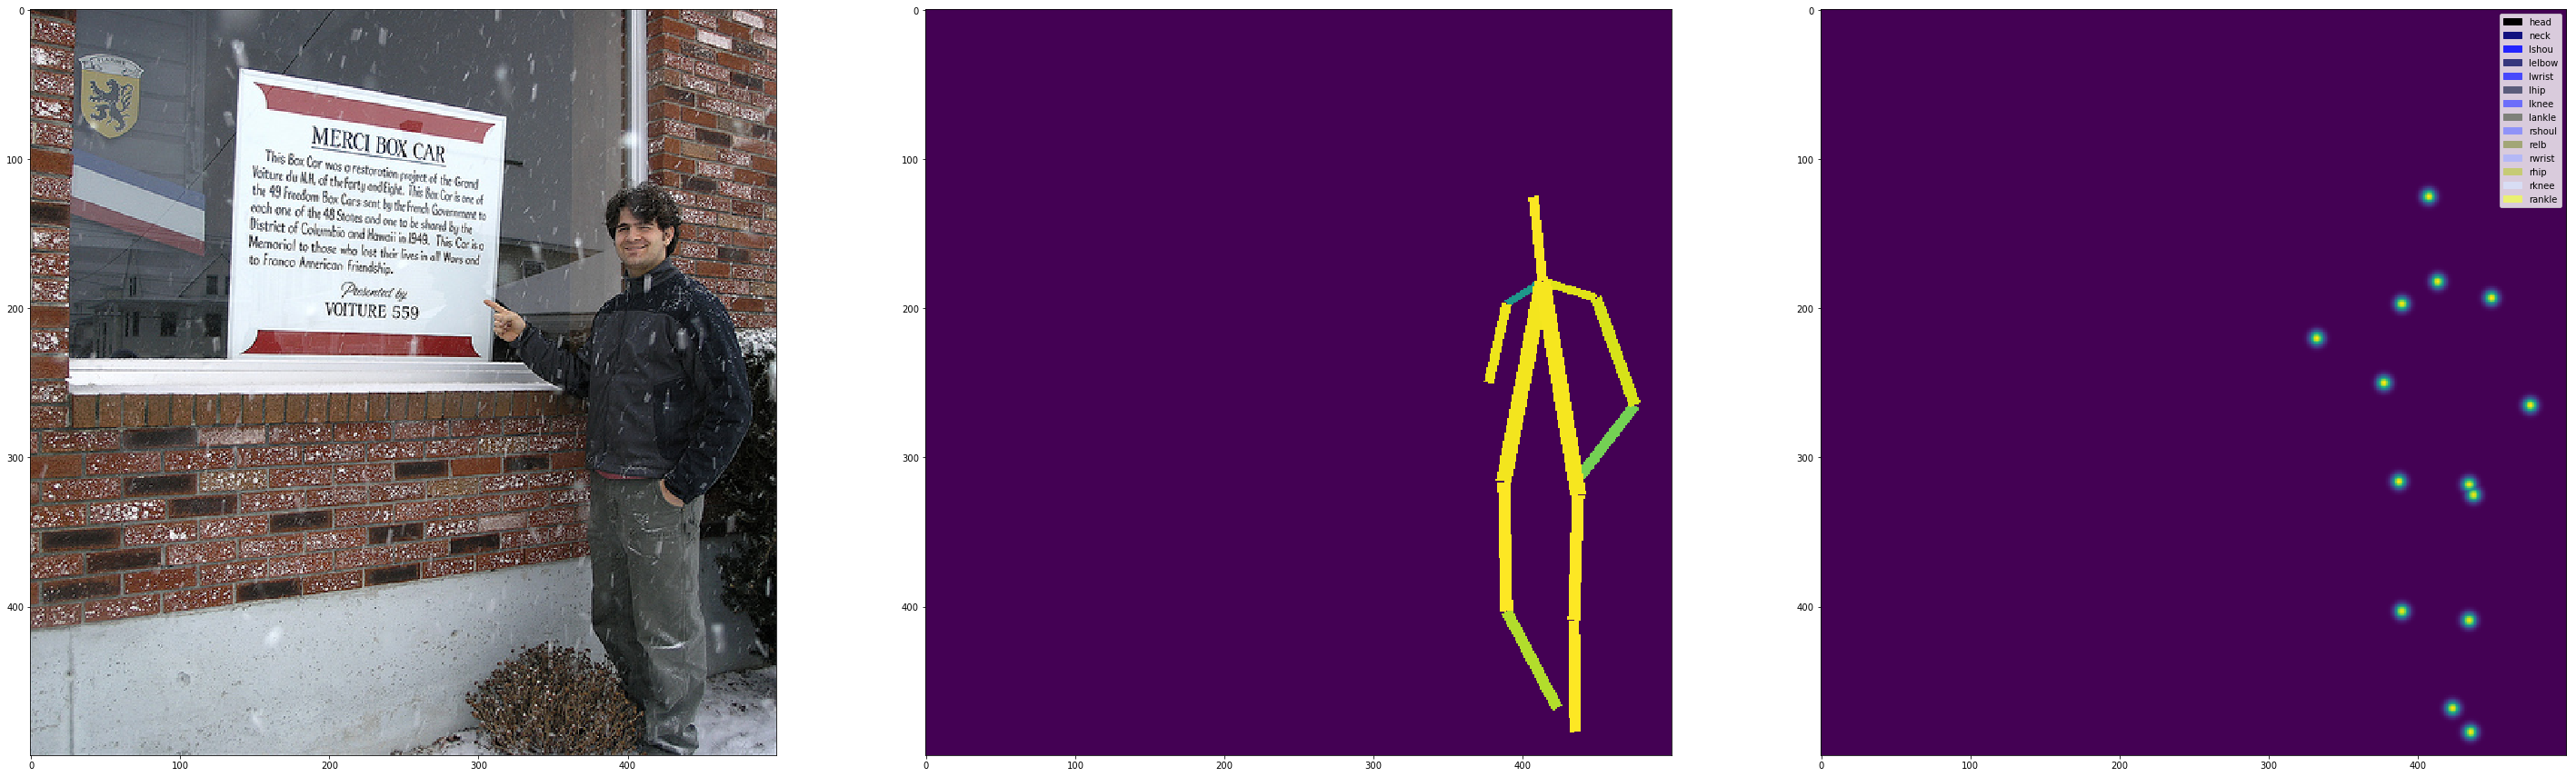

In [25]:
for ifile in files['val']:
    segment = PIL.Image.open(ifile['img'])
    # print(segment.size)
    segment = np.array(segment,dtype=np.uint8)
    # print(segment.shape)
    out,paf = genmat(ifile['lbl'],segment)
    tmp = np.ones((out.shape[1],out.shape[2],3))
    for i in range(len(out)):
        tmp[out[i]>0.5] = cmap2[i] 

    plt.figure(figsize=(50,50))
    plt.subplot(1,3,1)
    plt.imshow(segment)
    plt.subplot(1,3,2)
    plt.imshow(np.max(paf,axis=0))
#     plt.imshow(out[:8].max(axis=0))
    plt.subplot(1,3,3)
    plt.imshow(np.max(out,axis=0))
    plt.legend(handles,labels)
    plt.show()

In [ ]:
# DEMO
segment = PIL.Image.open('/extra_data/ayushya/VOCdevkit/VOC2010/JPEGImages/2009_000544.jpg')
# print(segment.size)
segment = np.array(segment,dtype=np.uint8)
# print(segment.shape)
out,paf = genmat('/extra_data/ayushya/pascal_data/pascal_data/PersonJoints/2009_000544.mat',segment)
# print(paf.shape)
# print(out.shape)